# Problem Statement

To build a loan Status predictor system that can predict whether the person is eligible for a loan or not by analysing various credintials of the person such as education, whether graduated or not, martial status and other such kinds of things. 

# Work Flow

1. Data Collection -> involves dataset consisting of differnrt variables to analyze whether to provide loan or not
2. Data Preprocessing -> Processing of raw data before fed to the Machine Learning model
3. Data Analysis -> to understand the insights of the data, what is this data all about and other such kind of things
3. Data Encoding -> to convert the categorical variables into numerical 
4. Data Splitting -> training data & test data
5. Model Building -> Support Vector Machine model
6. Model Evaluation -> Using the test data

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection

In [2]:
data = pd.read_csv('Loan_Status.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# checking for missing values in the dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Preprocessing

In [7]:
# Handling the missing values

# Dropping all the missing values
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data.shape

(480, 13)

# Data Analysis

In [10]:
# Statistical measures of the dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


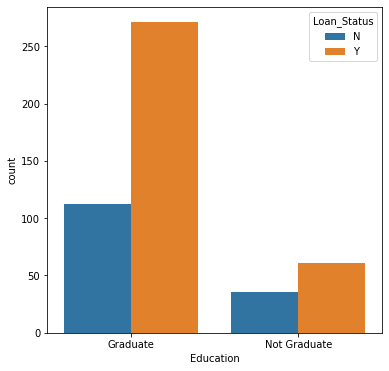

In [11]:
# distribution of Education with respect to loan status
plt.figure(figsize=(6,6))
sb.countplot(x='Education', hue='Loan_Status', data=data)
plt.show()

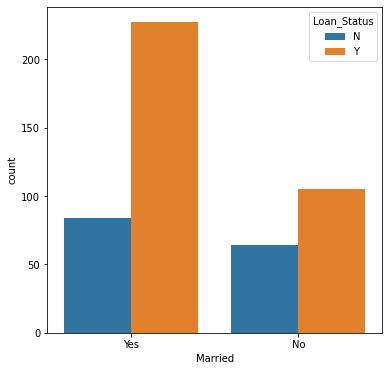

In [12]:
# distribution of Married with respect to loan status
plt.figure(figsize=(6,6))
sb.countplot(x='Married', hue='Loan_Status', data=data)
plt.show()

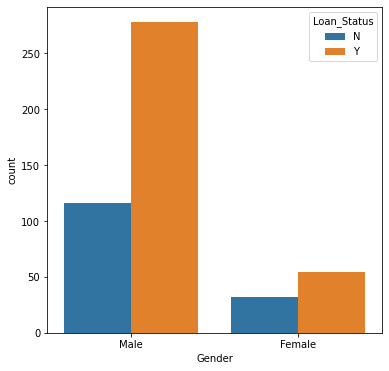

In [13]:
# distribution of Gender with respect to loan status
plt.figure(figsize=(6,6))
sb.countplot(x='Gender', hue='Loan_Status', data=data)
plt.show()

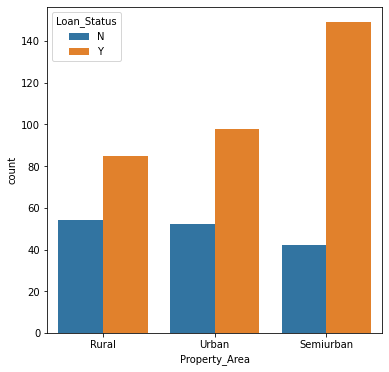

In [14]:
# distribution of Property area with respect to loan status
plt.figure(figsize=(6,6))
sb.countplot(x='Property_Area', hue='Loan_Status', data=data)
plt.show()

# Data Encoding

In [15]:
# replacing the Loan status values of Y and N as 1 & 0 respectively
data.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)

In [16]:
# Dependebts column values
data.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [17]:
# replacing the value of 3+ to 4
data.replace(to_replace='3+', value=4, inplace=True)

In [18]:
data.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [19]:
# convert the remaining categorical columns into numerical
data.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'Yes':1,'No':0},
             'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}, 'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

In [20]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# Data Splitting

In [21]:
x = data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = data.Loan_Status

In [22]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [23]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [24]:
# Splitting into training data & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [25]:
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (432, 11) (48, 11)


# Support Vector Machine

**Model Building**

In [26]:
# Loading Support Vector Machine Model
model = svm.SVC(kernel='linear').fit(x_train,y_train)

In [27]:
# accuracy of training data
x_train_pred = model.predict(x_train)
training_accuracy = accuracy_score(x_train_pred, y_train)
training_accuracy

0.7962962962962963

**Model Evaluation**

In [28]:
# accuracy of test data
x_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(x_test_pred, y_test)
test_accuracy

0.8125

In [38]:
# import accuracy_score, precision_score, recall_score, f1_score from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_pred)))
print('Precision score: ', format(precision_score(y_test, x_test_pred)))
print('Recall score: ', format(recall_score(y_test, x_test_pred)))
print('F1 score: ', format(f1_score(y_test, x_test_pred)))

Accuracy score:  0.8125
Precision score:  0.7857142857142857
Recall score:  1.0
F1 score:  0.88


# Making a predective System

In [29]:
# input data -> (Male,No,0,Graduate,No,2014,1929,74,360,1,Urban)
# output ->  Y=>1

input_data = (1, 0, 0, 1, 0, 2014, 1929, 74, 360, 1, 2)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [30]:
prediction = model.predict(input_data_reshape)
print(prediction)

[1]


In [31]:
# input data -> (Male,Yes,2,Graduate,No,4400,0,127,360,0,Semiurban)
# output ->  N=>0

input_data = (1, 1, 2, 1, 0, 4400, 0, 127, 360, 0, 1)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [32]:
prediction = model.predict(input_data_reshape)
print(prediction)

[0]


# Logistic Regression

In [34]:
# loading the logistic regression model
from sklearn.linear_model import LogisticRegression

model_logistic_reg  = LogisticRegression().fit(x_train, y_train)

In [36]:
# accuracy of training data

x_train_log = model_logistic_reg.predict(x_train)
training_accuracy_log = accuracy_score(x_train_log, y_train)
training_accuracy_log

0.7986111111111112

In [37]:
# accuracy of test data

x_test_log = model_logistic_reg.predict(x_test)
test_accuracy_log = accuracy_score(x_test_log, y_test)
test_accuracy_log

0.8333333333333334

In [39]:
# import accuracy_score, precision_score, recall_score, f1_score from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_log)))
print('Precision score: ', format(precision_score(y_test, x_test_log)))
print('Recall score: ', format(recall_score(y_test, x_test_log)))
print('F1 score: ', format(f1_score(y_test, x_test_log)))

Accuracy score:  0.8333333333333334
Precision score:  0.8048780487804879
Recall score:  1.0
F1 score:  0.8918918918918919


# Comparison

Decreasing order of accuracy is depicted as:
- Logistic Regression - 0.8334
- Neural Networks - 0.8130
- Support Vector Machine - 0.8125

The results are highly clear that both the models are good in predicting the loan status. Logistic Regression is the most accurate method because its ability to handle binary data. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them.